# Data Augmentation:
## Import the Libraries

In [5]:
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Using a Single Image

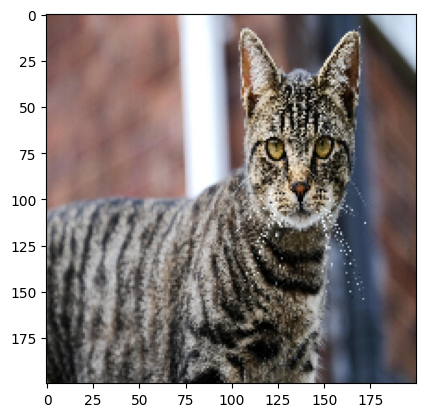

In [3]:
img = image.load_img("data/cat-1.jpg", target_size=(200, 200))

plt.imshow(img)
plt.show()

In [4]:
# define the Image Data Generator Object
datagen = ImageDataGenerator(
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode="nearest"
)

# create a batch for the image
img = image.img_to_array(img)
print(img.shape)
input_batch = img.reshape(1, 200, 200, 3)

# now generate the augmented images
i = 0
for output in datagen.flow(input_batch, batch_size=1, save_to_dir="aug"):
    i += 1
    
    if i == 10:
        break

(200, 200, 3)


## Image Data Generator to Image Folder/Multiple Images

In [ ]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# this is the augmentation configuration we will use for testing
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in subfolders
# of "data/train" and indefinitely generate batches of augmented image
train_generator = train_datagen.flow_from_directory(
    "data/train", # this is the target directory
    target_size=(150, 150), # all images will be resized to this
    batch_size=batch_size,
    class_mode="binary", # since we use binary_crossentropy, we need binary labels
)

# this is a similar generator for validation data
validation_generator = test_datagen.flow_from_directory(
    "data/validation",
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode="binary"
)

# when you train the model, you need to follow this
model = Sequential([
    # define the different CNN layers
])

# compile the model
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

# train the model (### NEW??)
model.fit_generator(
    train_generator,
    steps_per_epoch=2000 // batch_size,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=800 // batch_size
)